<a href="https://colab.research.google.com/github/VladGKulikov/Applied-Statistics-MSAI-2022/blob/main/HW5_Problem_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 6. 

(3 bonus points) **Computer experiment.**

**Use the following code to load the data and get acquainted with it.**

In [ ]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
df = data["frame"]
colors = df["color_intensity"]
hues = df["hue"]

**Compute the Pearson correlation coefficient between colors and hues. Remember normality assumption! Provide estimates, tests, and confidence intervals.**

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<Figure size 1080x504 with 0 Axes>

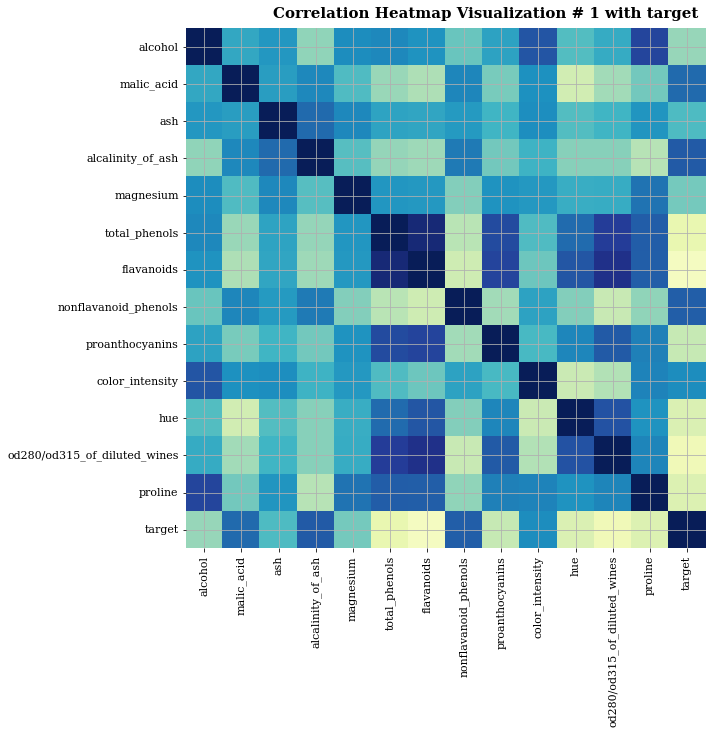

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
result = df.corr()
sns.heatmap(result, ax=ax, cmap="YlGnBu", center=0, square=True, cbar=False)

fig.text(0.97, 1, 'Correlation Heatmap Visualization # 1 with target', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1080x504 with 0 Axes>

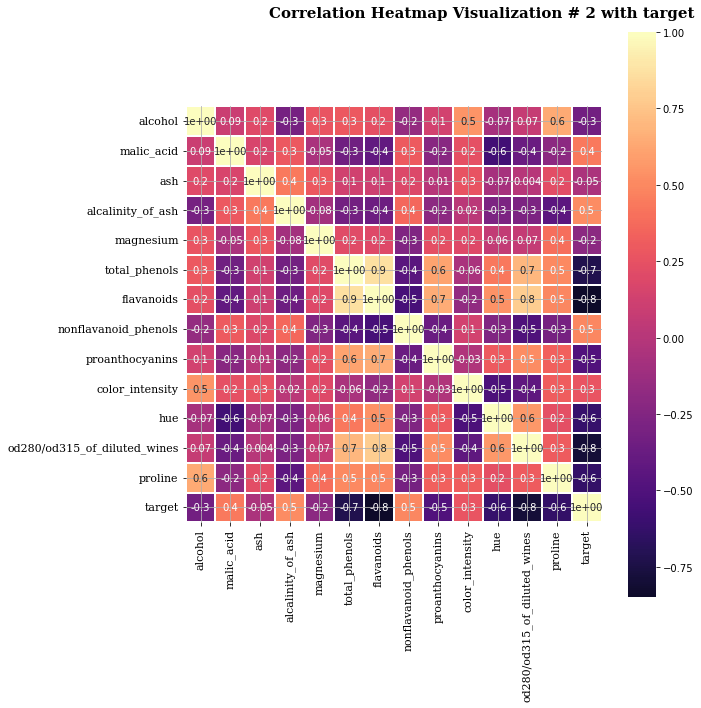

In [ ]:
plt.figure(figsize=(15, 7))
fig, ax = plt.subplots(figsize=(10,10))
result = df.corr()

sns.heatmap(result, ax=ax, cmap="magma", center=0, square=True, cbar={"orientation": "horizontal"} , annot=True, fmt=".1", linewidths=1.0)

fig.text(0.97, 1, 'Correlation Heatmap Visualization # 2 with target', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 1080x504 with 0 Axes>

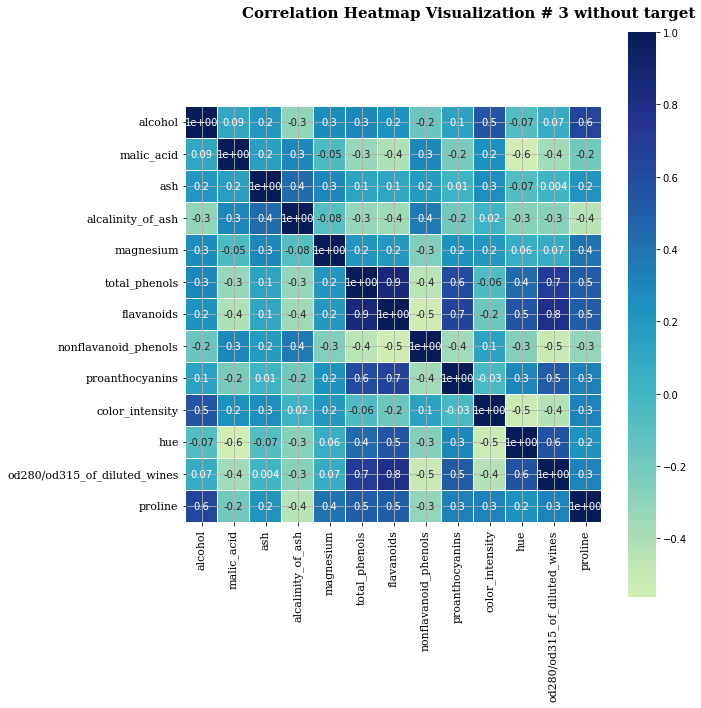

In [ ]:
l = [i for i in df.columns if i != 'target']

plt.figure(figsize=(15, 7))
fig, ax = plt.subplots(1, 1, figsize=(10,10))
result = df[l].corr()
sns.heatmap(result, ax=ax, cmap="YlGnBu", center=0, square=True, cbar={"orientation": "horizontal"} , annot=True, fmt=".0", linewidths=.5)

fig.text(0.97, 1, 'Correlation Heatmap Visualization # 3 without target', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)
plt.grid()
plt.tight_layout()
plt.show()

**Compute the Pearson correlation coefficient between colors and hues. Remember normality assumption! Provide estimates, tests, and confidence intervals.**

https://data.library.virginia.edu/understanding-q-q-plots/#:~:text=A%20Q%2DQ%20plot%20is%20a,truly%20come%20from%20Normal%20distributions.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that’s roughly straight. 

Here’s we see that a graph is having a degree of 45 angle a Normal Q-Q plot when both sets of quantiles truly come from Normal distributions.

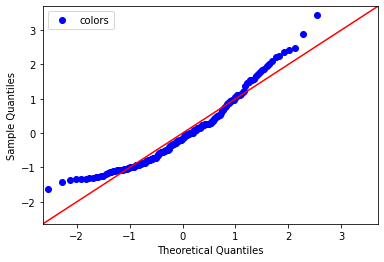

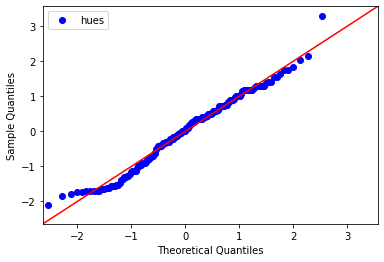

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(colors, label = 'colors', fit=True, line="45")
plt.legend()
qqplot(hues,  label = 'hues', fit=True, line="45")
plt.legend()
plt.show()

In [ ]:
# The Shapiro-Wilk test for normality.
import scipy.stats as stat
print(f'stat.shapiro(colors) = {stat.shapiro(colors)}')
print(f'stat.shapiro(hues) = {stat.shapiro(hues)}')

stat.shapiro(colors) = (0.9403185844421387, 9.22947720027878e-07)
stat.shapiro(hues) = (0.9813423752784729, 0.01742566004395485)


In [ ]:
import math
from tqdm import tqdm

def get_pearson_correlation(xx, yy):
    mu_1 = xx.mean()
    mu_2 = yy.mean()
    sigma2_1 = ((xx - mu_1)**2).mean()
    sigma2_2 = ((yy - mu_2)**2).mean()
    
    return ((xx - mu_1) * (yy - mu_2)).mean() / math.sqrt(sigma2_1 * sigma2_2)

def bootstrap_correlation(xx, yy, corr_fun, B=10000, alpha=0.05):
    n = len(xx)
    assert len(yy) == n, 'Sequences must have same length'
    
    t_boot = np.empty(B)
    for i in tqdm(range(B)):
        indexes = np.random.randint(0, n, size=n)
        xx_selected, yy_selected = xx.iloc[indexes], yy.iloc[indexes]
        t_boot[i] = corr_fun(xx_selected, yy_selected)
        
    confidence_interval = (np.quantile(t_boot, alpha / 2), np.quantile(t_boot, 1 - alpha / 2))
    return confidence_interval 

In [ ]:
pearson_rho = get_pearson_correlation(colors, hues)
pearson_rho_confidence = bootstrap_correlation(colors, hues, corr_fun = get_pearson_correlation, B = 10000, alpha=0.05)

print(f'\nPearson correlation coefficient: \t {pearson_rho:.3f}')
print('95%% pearson confidence interval: %.3f, %.3f' % pearson_rho_confidence)

100%|██████████| 10000/10000 [00:13<00:00, 759.42it/s]


Pearson correlation coefficient: 	 -0.522
95% pearson confidence interval: -0.621, -0.402


In [ ]:
# Test my solution
from scipy.stats.stats import pearsonr
pearsonr(colors,hues)

(-0.5218131932287576, 8.075008429977736e-14)

http://www.statistics4u.com/fundstat_eng/cc_test_r.html

A correlation coefficient of zero indicates that there is no linear relationship between two variables. In order to test the significance of a correlation coefficient we can use a test statistic t:

$$ t =  \frac {|r|} {\sqrt{1-r^2}} * \sqrt{n-2}$$ 

This test statistic is distributed according to a t-distribution. The correlation coefficient is considered to be statistically significant if the computed t value is greater than the critical value of a t-distribution with a level of significance of α/2 and n-2 degrees of freedom.

In [ ]:
import scipy.stats as stat

n = len(colors)
r = pearson_rho

alpha = 0.05

def t_statistic(corr, n):    
    return np.abs(corr) / (np.sqrt(1 - corr**2))*np.sqrt(n - 2)

def t_critical_value(alpha, n):    
    return stat.t.ppf(q = 1 - alpha / 2, df = n - 2)

t = t_statistic(pearson_rho, n)
c = t_critical_value(alpha, n)

print(f'Ttest value for colors and hues = {t:.3}\nStudent T-distribution critical value = {c:.3}')

Ttest value for colors and hues = 8.12
Student T-distribution critical value = 1.97


# **MY CONCLUSION:**

Pearson correlation coefficient pho:  $ 0.5 < |pho=-0.52| < 0.7 $
and 95% pearson confidence interval is: $-0.621, -0.399$

It means that we have average correlation between colors and hues.

The p-value of test $ <  0.05  => $ correlation is significant.

Test statistic $ t: 8.12 $

This test statistic is distributed according to a t-distribution and critial value $ tcritical = 1.97 (df = 176).$

$t > t critical   =>$  we have significant correlation between colors and hues and we can reject $H_0$ hypothesis that the correlation is zero.